# Sınıflandırma Problemleri
Regresyon modellerinde bağımlı değişkenimiz bir sürekli değişkendi, burada bağımlı değişken kategorik bir değişken olacak.
1. Logistic Regression
2. Gaussian Naive Bayes
3. KNN
4. SVC
5. RBF SVC
6. Neural Networks
7. CART
8. Random Forest
9. Gradient Boosting Machines
10. XGBoost
11. LightGBM
12. CatBoost

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 
Amacı sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. y değişkenimiz kategorik olduğu için, y değişkeninin tahmin edilmesine sınıflandırma problemi denir.

## Model 

In [242]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [246]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

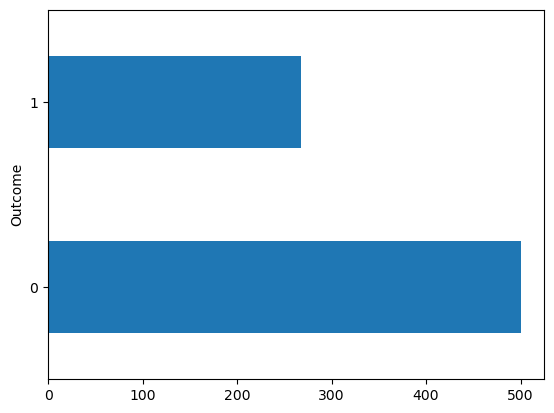

In [248]:
df["Outcome"].value_counts().plot.barh();

In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [252]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

### Statsmodel ile modelleme

In [255]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                 0.05922
Time:                        02:14:20   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

### Scikit-learn ile modelleme

In [258]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [260]:
loj_model.intercept_#sabit değer

array([-5.89086481])

In [262]:
loj_model.coef_#bağımsız değişkenin katsayıları

array([[ 1.17048205e-01,  2.83845957e-02, -1.68888600e-02,
         7.55799415e-04, -6.42571814e-04,  5.97485192e-02,
         6.77694300e-01,  7.23791433e-03]])

## Tahmin & Model Tuning

In [265]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)#gerçek değer, tahmin değeri

array([[448,  52],
       [121, 147]])

In [267]:
accuracy_score(y, y_pred)

0.7747395833333334

In [269]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [271]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [273]:
loj_model.predict_proba(X)[0:10][:,0:2] #0 ve 1 olma olasılık değerlerini gösterir

array([[0.35042766, 0.64957234],
       [0.91700373, 0.08299627],
       [0.22475309, 0.77524691],
       [0.92137419, 0.07862581],
       [0.16723545, 0.83276455],
       [0.79897016, 0.20102984],
       [0.88017279, 0.11982721],
       [0.27814554, 0.72185446],
       [0.32062823, 0.67937177],
       [0.92270375, 0.07729625]])

In [275]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [277]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.64957234, 0.08299627, 0.77524691, 0.07862581, 0.83276455,
       0.20102984, 0.11982721, 0.72185446, 0.67937177, 0.07729625])

In [279]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [281]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [283]:
accuracy_score(y, y_pred)

0.7747395833333334

In [285]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [287]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64957234, 0.08299627, 0.77524691, 0.07862581, 0.83276455])

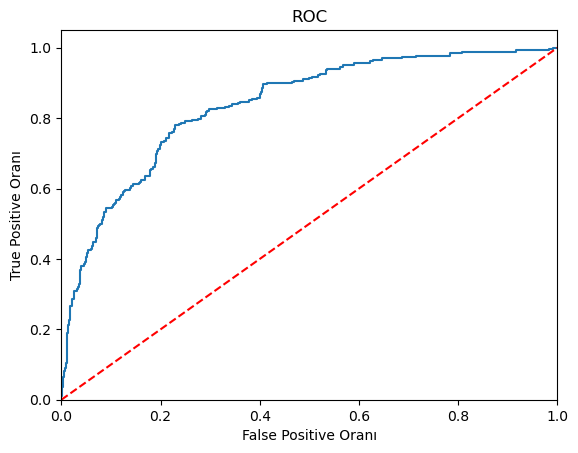

In [289]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [293]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [295]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [297]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

# Gaussian Naive Bayes
Olasılık temelli bir modelleme tekniğidir. Amacı belirli bir örneğin her bir sınıfa ait olma olasılığını koşullu olasılık temelli hesaplanmasıdır. Çok sınıflı değişkenler indirgenemediğinde kullanılabilir.\
(Bağımlı değişkenin sınıfları olan 0 ve 1 değerlerinin dağılımları birbirlerinden çok farklı ise test seti için ayrılan veri artırılabilir)

In [228]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [230]:
from sklearn.naive_bayes import GaussianNB

In [232]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [234]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [236]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [238]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [240]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Tahmin

In [72]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [74]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [76]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [81]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [83]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [85]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)#arkada y_pred oluşturup accuracy_score'u hesaplar.

0.7316017316017316

In [87]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC
Amacı iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.

## Model & Tahmin

In [89]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [91]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(kernel='linear')

In [92]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [128]:
svc_params = {"C": np.arange(1,10)}#C değeri 0 olamaz. bu hiperparametre aykırı gözlemlerin göreceli olarak etkilerini
#kontrol altında tutup düzlemi oluşturmaya imkan sağlar
svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [130]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [95]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [96]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC
Doğrusal olmayan Destek Vektör Makineleri

## Model & Tahmin

In [99]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [101]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
svc_model

SVC()

In [103]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [105]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [150]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [151]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [107]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [109]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

## Model & Tahmin

In [111]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

In [115]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [119]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [121]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [230]:
mlpc

MLPClassifier()

In [195]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/Aconda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'},

In [123]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 1)

mlpc_cv_model.fit(X_train_scaled, y_train)

In [238]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [125]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100),
                          solver = "adam")

In [127]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100))

In [129]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7489177489177489

# CART

## Model & Tahmin

In [131]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model

DecisionTreeClassifier()

In [137]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (0 if x[2] <= 66.5 else 1) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[6] <= 0.6269999742507935 else 0) if x[5] <=
    26.9499

In [139]:
x = [9]

In [141]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [143]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

## Model Tuning

In [260]:
cart_model

DecisionTreeClassifier()

In [ ]:
?cart_model

In [145]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [264]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5

In [266]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [147]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [149]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [151]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [155]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [278]:
rf_model

RandomForestClassifier()

In [ ]:
?rf_model

In [157]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [282]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [284]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END ..................max_depth=6, min_samples_split=24; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=24; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=25; total time=   0.0s
[CV] END ..................max_depth=6, min_

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [285]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [159]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=10)

In [161]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [163]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

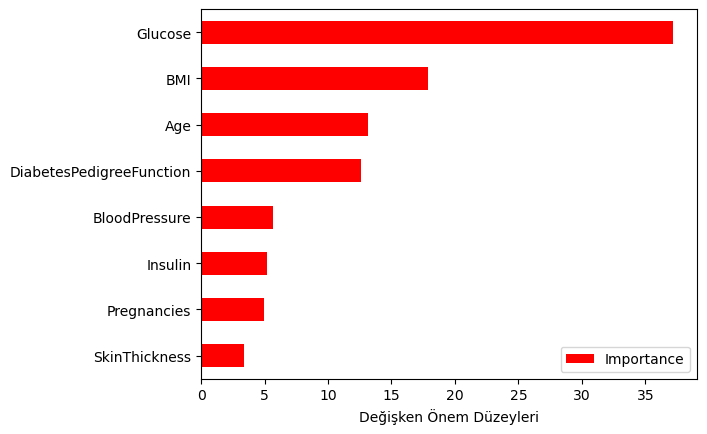

In [165]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [167]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [169]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [171]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [174]:
gbm_model

GradientBoostingClassifier()

In [ ]:
?gbm_model

In [176]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [178]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [308]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END ..................max_depth=9, min_samples_split=37; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=37; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=41; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=42; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=42; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=44; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=44; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=44; total time=   0.0s
[CV] END ..................max_depth=9, min_

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [309]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [180]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 100)

In [182]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [184]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# XGBoost

In [186]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [188]:
#!pip install xgboost
from xgboost import XGBClassifier

In [190]:
xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [192]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [194]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
?xgb_model

In [196]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [198]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [200]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [202]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [204]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# LightGBM

In [305]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [307]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [309]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [311]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [313]:
lgbm_model

LGBMClassifier()

In [ ]:
?lgbm_model

In [315]:
lgbm_params = {
        'n_estimators': [100, 300, 600],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1,0.01,0.05],
        "min_child_samples": [5,10,20]}

In [317]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 600,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBoost

## Model & Tahmin

In [52]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [54]:
#!pip install catboost
from catboost import CatBoostClassifier

In [56]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 68ms	remaining: 1m 7s
1:	learn: 0.6843414	total: 70.1ms	remaining: 35s
2:	learn: 0.6805760	total: 72.6ms	remaining: 24.1s
3:	learn: 0.6765782	total: 74.4ms	remaining: 18.5s
4:	learn: 0.6720829	total: 76.7ms	remaining: 15.3s
5:	learn: 0.6681617	total: 78.6ms	remaining: 13s
6:	learn: 0.6641912	total: 80ms	remaining: 11.4s
7:	learn: 0.6602881	total: 81.3ms	remaining: 10.1s
8:	learn: 0.6562626	total: 82.5ms	remaining: 9.09s
9:	learn: 0.6528483	total: 83.7ms	remaining: 8.29s
10:	learn: 0.6487823	total: 84.9ms	remaining: 7.63s
11:	learn: 0.6454980	total: 85.9ms	remaining: 7.07s
12:	learn: 0.6418953	total: 87ms	remaining: 6.61s
13:	learn: 0.6374431	total: 88.2ms	remaining: 6.21s
14:	learn: 0.6339676	total: 89.3ms	remaining: 5.87s
15:	learn: 0.6304252	total: 90.9ms	remaining: 5.59s
16:	learn: 0.6266998	total: 92ms	remaining: 5.32s
17:	learn: 0.6237660	total: 93ms	remaining: 5.07s
18:	learn: 0.6204394	total: 93.9ms	remaining: 4.85s
19:	lear

In [58]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [60]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [62]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6668078	total: 49.9ms	remaining: 9.93s
1:	learn: 0.6475263	total: 50.5ms	remaining: 5s
2:	learn: 0.6321175	total: 51.2ms	remaining: 3.36s
3:	learn: 0.6190658	total: 51.8ms	remaining: 2.54s
4:	learn: 0.6022005	total: 52.5ms	remaining: 2.05s
5:	learn: 0.5868926	total: 53.1ms	remaining: 1.72s
6:	learn: 0.5783249	total: 53.7ms	remaining: 1.48s
7:	learn: 0.5687414	total: 54.2ms	remaining: 1.3s
8:	learn: 0.5602651	total: 54.9ms	remaining: 1.17s
9:	learn: 0.5549374	total: 55.5ms	remaining: 1.05s
10:	learn: 0.5480875	total: 56.1ms	remaining: 964ms
11:	learn: 0.5382459	total: 57.7ms	remaining: 903ms
12:	learn: 0.5294391	total: 58.3ms	remaining: 839ms
13:	learn: 0.5207003	total: 58.9ms	remaining: 782ms
14:	learn: 0.5151955	total: 63.9ms	remaining: 788ms
15:	learn: 0.5094023	total: 64.8ms	remaining: 745ms
16:	learn: 0.5027983	total: 65.4ms	remaining: 705ms
17:	learn: 0.4979184	total: 67ms	remaining: 678ms
18:	learn: 0.493248

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [63]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [66]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 3.72ms	remaining: 740ms
1:	learn: 0.6811157	total: 6.16ms	remaining: 610ms
2:	learn: 0.6752970	total: 8.37ms	remaining: 550ms
3:	learn: 0.6697432	total: 10.5ms	remaining: 516ms
4:	learn: 0.6641758	total: 12.7ms	remaining: 494ms
5:	learn: 0.6576656	total: 14.8ms	remaining: 479ms
6:	learn: 0.6521870	total: 16.8ms	remaining: 463ms
7:	learn: 0.6465564	total: 18.7ms	remaining: 449ms
8:	learn: 0.6407595	total: 20.5ms	remaining: 436ms
9:	learn: 0.6357725	total: 22.3ms	remaining: 424ms
10:	learn: 0.6299942	total: 24.1ms	remaining: 414ms
11:	learn: 0.6240480	total: 25.9ms	remaining: 406ms
12:	learn: 0.6196095	total: 27.7ms	remaining: 399ms
13:	learn: 0.6148715	total: 30.2ms	remaining: 401ms
14:	learn: 0.6092626	total: 32ms	remaining: 395ms
15:	learn: 0.6046764	total: 35.7ms	remaining: 410ms
16:	learn: 0.6012725	total: 38.1ms	remaining: 410ms
17:	learn: 0.5958121	total: 39.9ms	remaining: 404ms
18:	learn: 0.5903243	total: 41.7ms	remaining: 397ms
19:	learn: 0.5866024	tot

In [68]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Tüm Modellerin Karşılaştırılması

In [299]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.8918%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 75.3247%
----------------------------
XGBClassifier:
Accuracy: 75.3247%


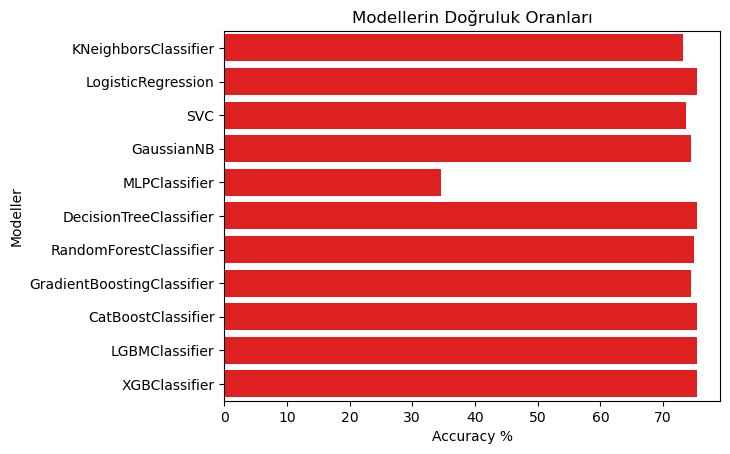

In [303]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    